In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import kernel
from deflected_subgradient import solveDeflected
from SVR import *
import matplotlib.pyplot as plt
import random

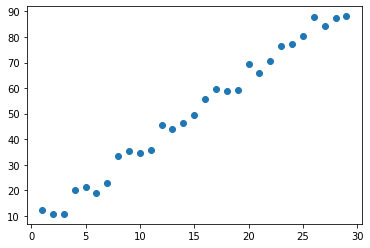

In [2]:
x = np.vstack(np.arange(1,30,1))
# y = np.array([[45000],[50000],[60000],[80000],[110000],[150000],[200000],[300000],[500000],[1000000]])
y = np.array([3*x[i]+random.uniform(1,10) for i in range(len(x))])
plt.scatter(x,y)
plt.show()

In [3]:
sc_X = StandardScaler()
sc_y = StandardScaler()
x = sc_X.fit_transform(x)
y = sc_y.fit_transform(y)

vareps = optim_args['vareps'] if 'vareps' in optim_args else 0.1
    maxiter = optim_args['maxiter'] if 'maxiter' in optim_args else 10000
    deltares = optim_args['deltares'] if 'deltares' in optim_args else 1e-4
    rho = optim_args['rho'] if 'rho' in optim_args else 0.95
    eps = optim_args['eps'] if 'eps' in optim_args else 1e-1
    alpha = optim_args['alpha'] if 'alpha' in optim_args else 0.7
    psi = optim_args['psi'] if 'psi' in optim_args else 0.7
    return vareps, maxiter, deltares, rho, eps, alpha, psi

In [4]:
K = kernel.linear(x)
box = 10.0
x_init = np.zeros(x.shape)
beta = solveDeflected(x_init, y, K, box, {'eps':1e-2, 'maxiter':1e+3}, True)

i:    0 - v: 0.000000 - fref:  inf - ||g||: 5.385165 - delta: 0.000000e+00 - ||gdiff||:  inf - eps: 1.000000e-02
i:    1 - v: -0.000091 - fref: 0.000000 - ||g||: 4.923615 - delta: 1.000000e-04 - ||gdiff||: 0.461550 - eps: 1.000000e-02
i:    2 - v: -0.007587 - fref: -0.000091 - ||g||: 4.881666 - delta: 1.000000e-02 - ||gdiff||: 0.041949 - eps: 1.000000e-02
i:    3 - v: -0.014687 - fref: -0.007587 - ||g||: 4.838159 - delta: 1.000000e-02 - ||gdiff||: 0.043507 - eps: 1.000000e-02
i:    4 - v: -0.021679 - fref: -0.014687 - ||g||: 4.796721 - delta: 1.000000e-02 - ||gdiff||: 0.041438 - eps: 1.000000e-02
i:    5 - v: -0.028637 - fref: -0.021679 - ||g||: 4.755139 - delta: 1.000000e-02 - ||gdiff||: 0.041582 - eps: 1.000000e-02
i:    6 - v: -0.035582 - fref: -0.028637 - ||g||: 4.715100 - delta: 1.000000e-02 - ||gdiff||: 0.040039 - eps: 1.000000e-02
i:    7 - v: -0.042524 - fref: -0.035582 - ||g||: 4.671067 - delta: 1.000000e-02 - ||gdiff||: 0.044033 - eps: 1.000000e-02
i:    8 - v: -0.049466 - fr

i:  163 - v: -0.797233 - fref: -0.795235 - ||g||: 0.360878 - delta: 1.000000e-02 - ||gdiff||: -0.005150 - eps: 1.000000e-02
i:  164 - v: -0.802737 - fref: -0.797233 - ||g||: 0.423671 - delta: 1.000000e-02 - ||gdiff||: -0.062794 - eps: 1.000000e-02
i:  165 - v: -0.804851 - fref: -0.802737 - ||g||: 0.424549 - delta: 1.000000e-02 - ||gdiff||: -0.000877 - eps: 1.000000e-02
i:  166 - v: -0.807663 - fref: -0.804851 - ||g||: 0.332428 - delta: 1.000000e-02 - ||gdiff||: 0.092121 - eps: 1.000000e-02
i:  167 - v: -0.810878 - fref: -0.807663 - ||g||: 0.383818 - delta: 1.000000e-02 - ||gdiff||: -0.051390 - eps: 1.000000e-02
i:  168 - v: -0.813998 - fref: -0.810878 - ||g||: 0.374342 - delta: 1.000000e-02 - ||gdiff||: 0.009477 - eps: 1.000000e-02
i:  169 - v: -0.818550 - fref: -0.813998 - ||g||: 0.370878 - delta: 1.000000e-02 - ||gdiff||: 0.003464 - eps: 1.000000e-02
i:  170 - v: -0.820641 - fref: -0.818550 - ||g||: 0.462164 - delta: 1.000000e-02 - ||gdiff||: -0.091286 - eps: 1.000000e-02
i:  171 - v

i:  315 - v: -1.179101 - fref: -1.178715 - ||g||: 0.387014 - delta: 1.178715e-03 - ||gdiff||: -0.006770 - eps: 1.000000e-03
i:  316 - v: -1.179437 - fref: -1.179101 - ||g||: 0.382809 - delta: 1.179101e-03 - ||gdiff||: 0.004206 - eps: 1.000000e-03
i:  317 - v: -1.179780 - fref: -1.179437 - ||g||: 0.356518 - delta: 1.179437e-03 - ||gdiff||: 0.026290 - eps: 1.000000e-03
i:  318 - v: -1.180217 - fref: -1.179780 - ||g||: 0.418828 - delta: 1.179780e-03 - ||gdiff||: -0.062310 - eps: 1.000000e-03
i:  319 - v: -1.180546 - fref: -1.180217 - ||g||: 0.373955 - delta: 1.180217e-03 - ||gdiff||: 0.044873 - eps: 1.000000e-03
i:  320 - v: -1.180952 - fref: -1.180546 - ||g||: 0.333339 - delta: 1.180546e-03 - ||gdiff||: 0.040616 - eps: 1.000000e-03
i:  321 - v: -1.181457 - fref: -1.180952 - ||g||: 0.435474 - delta: 1.180952e-03 - ||gdiff||: -0.102135 - eps: 1.000000e-03
i:  322 - v: -1.181780 - fref: -1.181457 - ||g||: 0.369363 - delta: 1.181457e-03 - ||gdiff||: 0.066111 - eps: 1.000000e-03
i:  323 - v: 

i:  486 - v: -1.244337 - fref: -1.244157 - ||g||: 0.327380 - delta: 4.217707e-04 - ||gdiff||: 0.090972 - eps: 1.000000e-04
i:  487 - v: -1.244467 - fref: -1.244337 - ||g||: 0.349966 - delta: 4.006822e-04 - ||gdiff||: -0.022586 - eps: 1.000000e-04
i:  488 - v: -1.244655 - fref: -1.244467 - ||g||: 0.381262 - delta: 3.806481e-04 - ||gdiff||: -0.031296 - eps: 1.000000e-04
i:  489 - v: -1.244760 - fref: -1.244655 - ||g||: 0.460147 - delta: 3.616157e-04 - ||gdiff||: -0.078885 - eps: 1.000000e-04
i:  490 - v: -1.244856 - fref: -1.244760 - ||g||: 0.352377 - delta: 3.435349e-04 - ||gdiff||: 0.107770 - eps: 1.000000e-04
i:  491 - v: -1.244926 - fref: -1.244856 - ||g||: 0.345683 - delta: 3.263581e-04 - ||gdiff||: 0.006693 - eps: 1.000000e-04
i:  492 - v: -1.245100 - fref: -1.244926 - ||g||: 0.332358 - delta: 3.100402e-04 - ||gdiff||: 0.013326 - eps: 1.000000e-04
i:  493 - v: -1.245196 - fref: -1.245100 - ||g||: 0.397953 - delta: 2.945382e-04 - ||gdiff||: -0.065596 - eps: 1.000000e-04
i:  494 - v:

i:  611 - v: -1.250499 - fref: -1.250464 - ||g||: 0.373674 - delta: 1.250464e-04 - ||gdiff||: -0.002179 - eps: 1.000000e-04
i:  612 - v: -1.250529 - fref: -1.250499 - ||g||: 0.334487 - delta: 1.250499e-04 - ||gdiff||: 0.039188 - eps: 1.000000e-04
i:  613 - v: -1.250598 - fref: -1.250529 - ||g||: 0.400523 - delta: 1.250529e-04 - ||gdiff||: -0.066036 - eps: 1.000000e-04
i:  614 - v: -1.250622 - fref: -1.250598 - ||g||: 0.364271 - delta: 1.250598e-04 - ||gdiff||: 0.036252 - eps: 1.000000e-04
i:  615 - v: -1.250676 - fref: -1.250622 - ||g||: 0.422699 - delta: 1.250622e-04 - ||gdiff||: -0.058428 - eps: 1.000000e-04
i:  616 - v: -1.250710 - fref: -1.250676 - ||g||: 0.357916 - delta: 1.250676e-04 - ||gdiff||: 0.064783 - eps: 1.000000e-04
i:  617 - v: -1.250734 - fref: -1.250710 - ||g||: 0.369857 - delta: 1.250710e-04 - ||gdiff||: -0.011941 - eps: 1.000000e-04
i:  618 - v: -1.250798 - fref: -1.250734 - ||g||: 0.338818 - delta: 1.250734e-04 - ||gdiff||: 0.031039 - eps: 1.000000e-04
i:  619 - v:

i:  754 - v: -1.253399 - fref: -1.253395 - ||g||: 0.413977 - delta: 1.253395e-05 - ||gdiff||: -0.079484 - eps: 1.000000e-05
i:  755 - v: -1.253404 - fref: -1.253399 - ||g||: 0.326516 - delta: 1.253399e-05 - ||gdiff||: 0.087461 - eps: 1.000000e-05
i:  756 - v: -1.253408 - fref: -1.253404 - ||g||: 0.438424 - delta: 1.253404e-05 - ||gdiff||: -0.111908 - eps: 1.000000e-05
i:  757 - v: -1.253412 - fref: -1.253408 - ||g||: 0.351652 - delta: 1.253408e-05 - ||gdiff||: 0.086772 - eps: 1.000000e-05
i:  758 - v: -1.253415 - fref: -1.253412 - ||g||: 0.377892 - delta: 1.253412e-05 - ||gdiff||: -0.026240 - eps: 1.000000e-05
i:  759 - v: -1.253419 - fref: -1.253415 - ||g||: 0.351291 - delta: 1.253415e-05 - ||gdiff||: 0.026602 - eps: 1.000000e-05
i:  760 - v: -1.253424 - fref: -1.253419 - ||g||: 0.371785 - delta: 1.253419e-05 - ||gdiff||: -0.020494 - eps: 1.000000e-05
i:  761 - v: -1.253430 - fref: -1.253424 - ||g||: 0.409311 - delta: 1.253424e-05 - ||gdiff||: -0.037526 - eps: 1.000000e-05
i:  762 - v

i:  922 - v: -1.254101 - fref: -1.254095 - ||g||: 0.354831 - delta: 1.254095e-05 - ||gdiff||: 0.020670 - eps: 1.000000e-05
i:  923 - v: -1.254104 - fref: -1.254101 - ||g||: 0.375337 - delta: 1.254101e-05 - ||gdiff||: -0.020505 - eps: 1.000000e-05
i:  924 - v: -1.254107 - fref: -1.254104 - ||g||: 0.400563 - delta: 1.254104e-05 - ||gdiff||: -0.025226 - eps: 1.000000e-05
i:  925 - v: -1.254113 - fref: -1.254107 - ||g||: 0.324775 - delta: 1.254107e-05 - ||gdiff||: 0.075788 - eps: 1.000000e-05
i:  926 - v: -1.254116 - fref: -1.254113 - ||g||: 0.424078 - delta: 1.254113e-05 - ||gdiff||: -0.099303 - eps: 1.000000e-05
i:  927 - v: -1.254121 - fref: -1.254116 - ||g||: 0.366322 - delta: 1.254116e-05 - ||gdiff||: 0.057756 - eps: 1.000000e-05
i:  928 - v: -1.254124 - fref: -1.254121 - ||g||: 0.347183 - delta: 1.254121e-05 - ||gdiff||: 0.019139 - eps: 1.000000e-05
i:  929 - v: -1.254129 - fref: -1.254124 - ||g||: 0.352454 - delta: 1.254124e-05 - ||gdiff||: -0.005271 - eps: 1.000000e-05
i:  930 - v:

In [5]:
beta

array([[ 9.50504011e-01],
       [-2.96274534e-06],
       [-1.11778412e+00],
       [ 8.41783637e-02],
       [-5.36347383e-06],
       [-1.71495550e+00],
       [-1.04342851e+00],
       [ 1.05225983e+00],
       [ 2.30446214e-01],
       [ 4.61302037e-06],
       [-1.26631582e-01],
       [ 1.17739353e+00],
       [ 3.83371798e-07],
       [-1.92710098e-06],
       [-2.92178661e-06],
       [ 1.90784172e-06],
       [ 4.61224631e-01],
       [ 5.42987711e-06],
       [-7.64105974e-01],
       [ 1.04987797e+00],
       [-2.70807452e-01],
       [-8.85746915e-06],
       [ 7.53744538e-06],
       [-6.94319460e-06],
       [ 7.73986882e-06],
       [ 1.56661229e+00],
       [-4.43737403e-06],
       [-1.51743746e-05],
       [-1.53476273e+00]])

In [6]:
mask = np.logical_or(beta > 1e-5, beta < -1e-5)
support = np.vstack(np.vstack(np.arange(len(beta)))[mask])
suppvect = np.vstack(x[mask])
y_sv = np.vstack(y[mask])
beta = np.vstack(beta[mask])
b = 0
for i in range(beta.size):
    b += y_sv[i]
    b -= np.sum(beta * K[support[i], np.hstack(mask)])
b -= 0.1 # -eps
b /= len(beta) # (why ?) (computing average bias ??)
W = np.dot(np.transpose(beta), suppvect)

suppvect = suppvect[[0,3,7,8,9]]

In [7]:
sum,count = 0,0
for el1,el2 in zip(beta,y_sv):
    print(el1, el2, W)
    print(el2-W)
    sum+=el2-W
    count+=1
    print()
print("b:",sum/count)

[0.95050401] [-1.52936686] [[1.00694408]]
[[-2.53631095]]

[-1.11778412] [-1.58743203] [[1.00694408]]
[[-2.59437611]]

[0.08417836] [-1.21387699] [[1.00694408]]
[[-2.22082107]]

[-1.7149555] [-1.25789444] [[1.00694408]]
[[-2.26483852]]

[-1.04342851] [-1.10490612] [[1.00694408]]
[[-2.1118502]]

[1.05225983] [-0.68308293] [[1.00694408]]
[[-1.69002701]]

[0.23044621] [-0.6049113] [[1.00694408]]
[[-1.61185539]]

[-0.12663158] [-0.5806324] [[1.00694408]]
[[-1.58757648]]

[1.17739353] [-0.19669352] [[1.00694408]]
[[-1.2036376]]

[0.46122463] [0.36675999] [[1.00694408]]
[[-0.64018409]]

[-0.76410597] [0.34662355] [[1.00694408]]
[[-0.66032053]]

[1.04987797] [0.75506202] [[1.00694408]]
[[-0.25188206]]

[-0.27080745] [0.61283042] [[1.00694408]]
[[-0.39411367]]

[1.56661229] [1.49893092] [[1.00694408]]
[[0.49198683]]

[-1.51743746e-05] [1.48697029] [[1.00694408]]
[[0.48002621]]

[-1.53476273] [1.50891646] [[1.00694408]]
[[0.50197238]]

b: [[-1.14336302]]


In [8]:
print(suppvect, b)

[[-1.67332005]
 [-1.43427433]
 [-1.31475147]
 [-1.07570575]
 [-0.95618289]
 [-0.83666003]
 [-0.71713717]
 [-0.47809144]
 [-0.35856858]
 [ 0.23904572]
 [ 0.47809144]
 [ 0.5976143 ]
 [ 0.71713717]
 [ 1.31475147]
 [ 1.55379719]
 [ 1.67332005]] [-0.1426708]


W : [[1.00694408]] - b: [-0.1426708]
The predicted salary of a person at 6.5 Level is  [[21.30428154]]
[-1.8276105298376528, -1.707257692160488, -1.586904854483323, -1.4665520168061583, -1.3461991791289938, -1.225846341451829, -1.1054935037746643, -0.9851406660974996, -0.8647878284203347, -0.7444349907431701, -0.6240821530660053, -0.5037293153888406, -0.3833764777116758, -0.2630236400345111, -0.1426708023573464, -0.022317964680181657, 0.09803487299698307, 0.21838771067414778, 0.3387405483513125, 0.45909338602847727, 0.5794462237056419, 0.6997990613828068, 0.8201518990599714, 0.9405047367371362, 1.060857574414301, 1.1812104120914655, 1.3015632497686302, 1.4219160874457952, 1.54226892512296]


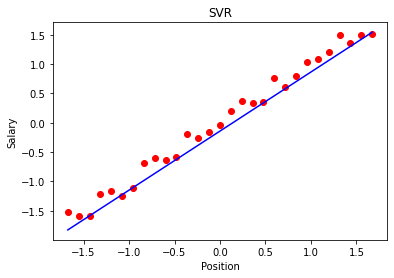

In [9]:
print(f"W : {W} - b: {b}")


# First transform 6.5 to feature scaling
sc_X_val = sc_X.transform(np.array([[6.5]]))
# Second predict the value
scaled_y_pred = predict_linear(W, b, sc_X_val)
# scaled_y_pred = predict_poly(W, b, beta, sc_X_val, suppvect, DEG)
# Third - since this is scaled - we have to inverse transform
y_pred = sc_y.inverse_transform(scaled_y_pred) 
print('The predicted salary of a person at 6.5 Level is ', y_pred)

plt.scatter(x, y , color="red")
pred = [float(predict_linear(W, b, x[i])) for i in range(x.size)]
#pred = [float(predict_poly(W, b, beta, x[i], suppvect, DEG)) for i in range(x.size)]
print(pred)
# X_grid = np.arange(min(x), max(x), 0.01) #this step required because data is feature scaled.
# X_grid = X_grid.reshape((len(X_grid), 1))
# x = X_grid
# pred = [float(predict_rbf(W, b, beta, elem, suppvect)) for elem in X_grid]
plt.plot(x, pred, color="blue")
plt.title("SVR")
plt.xlabel("Position")
plt.ylabel("Salary")
plt.show()

from scipy import optimize
g,dprev = np.array([1,2,3,4]),np.array([1,2,3,4])
def f(alpha):   # The rosenbrock function
    return np.linalg.norm(alpha*g+(1-alpha)*dprev)**2
alpha = 0.7
alpha = optimize.minimize(alpha,f, bounds=(0,1), method='bounded').x
alpha

PREDICTION:  [25.43609683]


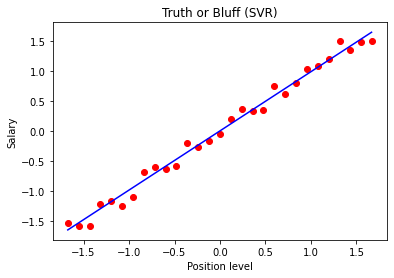

In [10]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'linear')
Y = np.hstack(y)
X = x
regressor.fit(X, Y)
y_scal = sc_X.transform(np.array([[6.5]]))
y_pred = regressor.predict(y_scal)
y_pred = sc_y.inverse_transform(y_pred)
print("PREDICTION: ",y_pred)
X_grid = np.arange(min(X), max(X), 0.01) #this step required because data is feature scaled.
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [11]:
suppvect

array([[-1.67332005],
       [-1.43427433],
       [-1.31475147],
       [-1.07570575],
       [-0.95618289],
       [-0.83666003],
       [-0.71713717],
       [-0.47809144],
       [-0.35856858],
       [ 0.23904572],
       [ 0.47809144],
       [ 0.5976143 ],
       [ 0.71713717],
       [ 1.31475147],
       [ 1.55379719],
       [ 1.67332005]])

In [12]:
regressor.support_vectors_

array([[-1.67332005],
       [-1.43427433],
       [-1.07570575],
       [-0.95618289],
       [-0.83666003],
       [-0.71713717],
       [-0.47809144],
       [-0.35856858],
       [ 0.23904572],
       [ 0.47809144],
       [ 0.5976143 ],
       [ 0.71713717],
       [ 1.31475147],
       [ 1.67332005]])

In [13]:
regressor.support_

array([ 0,  2,  5,  6,  7,  8, 10, 11, 16, 18, 19, 20, 25, 28])

In [14]:
regressor.epsilon

0.1

In [15]:
regressor.max_iter

-1

In [16]:
regressor.intercept_

array([0.00395956])

In [17]:
params = regressor.get_params()

In [18]:
params.keys()

dict_keys(['C', 'cache_size', 'coef0', 'degree', 'epsilon', 'gamma', 'kernel', 'max_iter', 'shrinking', 'tol', 'verbose'])

In [19]:
params['gamma']

'scale'

In [20]:
params['C']

1.0

In [21]:
regressor.coef_

array([[0.98847324]])